# Preamble

In [57]:
dir_home = '../'
dir_data = dir_home+'data/'
dir_fig = dir_home+'figs/'
import sys
sys.path.insert(0, dir_home)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from preamble import *
from natural_units_GeV import *

# Sensitivity

## Parameters (Eu)

In [58]:
R_S_EU = 10; #relativistic enhancement factor divided by effective quantum numbers
R_M_EU = 2; 
Z_S_EU = 63; # charge of Schiff atom
A_S_EU = 153; # atomic number of Schiff atom
M_S_EU = Z_S_EU**2 * R_S_EU / a_0**4 # atomic matrix element
M_M_EU = (Z_S_EU**2 * R_M_EU / m_electron) / a_0**4 # atomic matrix element for Schiff moment

rho_EU = 1.2e4 * kg * meter**-3 # mass density
N_c_EU = 10 # number of atoms in unit cell
N_S_EU = 5 # number of Schiff atoms
V_c_EU = amu * A_S_EU * N_S_EU / rho_EU # volume of unit cell

n_N_EU = N_S_EU/V_c_EU # number density of Schiff spins
S_schiff_over_theta_EU = 3.7 * e_EM * fm**3; # Schiff moment proportionality constant with theta
M_mqm_over_theta_EU = 1.0 * e_EM * fm**2; # MQM proportionality constant with theta

B_0 = 14*Tesla # static magnetic field
mu_N = 2*mu_nuclear # nuclear magnetic moment
T_0 = 1e-2 * Kelvin # temperature

n_N_det = 2e22 * cm**-3

c_aNN = 1/2

In [59]:
vec_D = np.asarray([0.15,1]) * mm
h = 1 * cm
vec_aspect = [300,300]
T_2 = 1e3 * second
t_int = 1 * year
vec_label = ['$D = $'+str(D/mm)+'$\,\mathrm{mm}$' for D in vec_D]
vec_lw = [1,3]

## Parameters, optimistic (Np)

In [60]:
gs = -13.45
g0 = 15.5*10**-3 #divided by theta angle
g1 = -0.2*g0

a0 = -0.1
a1 = 1.1

m0 = -0.31
m1 = 1.1

#MQMU = (m0*gs*g0+m1*gs*g1)*4*np.sqrt(np.pi/5)*e_EM/(2*m_proton)*fm
#SMU = (a0*gs*g0+a1*gs*g1)*e_EM*fm**3


In [61]:
(a0*gs*g0+a1*gs*g1)

0.066712

In [62]:
R_S = 30; #relativistic enhancement factor divided by effective quantum numbers
R_M = 6; #relativistic enhancement factor for MQM divided by effective quantum numbers
Z_S = 93; # charge of Schiff atom
A_S = 237; # atomic number of Schiff atom
M_S = Z_S**2  * R_S / a_0**4 # atomic matrix element for Schiff moment
M_M = (Z_S**2 * R_M / m_electron) / a_0**4 # atomic matrix element for Schiff moment

rho = 1.5e4 * kg * meter**-3 # mass density
N_c = 10 # number of atoms in unit cell
N_S = 5 # number of Schiff atoms
V_c = amu * A_S * N_S / rho # volume of unit cell

n_N = N_S/V_c # number density of Schiff spins
S_schiff_over_theta = 6*e_EM*fm**3; # Schiff moment proportionality constant with theta
M_mqm_over_theta = 1.3*e_EM*fm**2; # Magnetic quadrupole moment proportionality constant with theta

B_0 = 16*Tesla # static magnetic field
mu_N = 0.4*mu_nuclear # nuclear magnetic moment
T_0 = 1e-5 * Kelvin # temperature

n_N_det = 2e22 * cm**-3

c_aNN = 1/2

In [63]:
vec_D = np.asarray([0.15,1]) * mm
h = 0.5 * cm
vec_aspect = [300,300]
T_2 = 3e3 * second
t_int = 1 * year
vec_label = ['$D = $'+str(D/mm)+'$\,\mathrm{mm}$' for D in vec_D]
vec_lw = [1,3]

## Theory

In [64]:
def fn_fa(ma):
    return 1e12 * GeV * (5.70e-6 * eV)/ma

## Nuclear spin polarization

In [65]:
def fn_P_nuc(mu,B_0,T_0):
    return np.tanh(mu * B_0 / T_0);

In [66]:
P_nuc = fn_P_nuc(mu_N,B_0,T_0);
P_nuc

1.0

## Signal

\begin{align}
(\Box + m^2) a &= \frac{\rho_\mathsf{S}}{f}\\
\rho_\mathsf{S} &= - 4\pi e \frac{\partial \mathsf{S}}{\partial \overline{\theta}} n_N \vec{\mathcal{M}} \cdot \hat{I}
\end{align}
A distance $\vec{D}$ away from an infinite, uniform slab of thickness $h$, we find:
\begin{align}
\vec{\nabla} \overline{\theta}_a = - \frac{\rho_S}{2 \chi_\mathrm{QCD}} m e^{-m D} (1 - e^{-m h}) \hat{D}
\end{align}
The precessional frequency of a nuclear spin is then given by:
\begin{align}
\Omega = c_{aNN} \left| \vec{\nabla} \overline{\theta}_a \right|
\end{align}

In [67]:
E_S = 4 * np.pi * e_EM * S_schiff_over_theta * M_S * P_nuc
E_M =  e_EM * M_mqm_over_theta * M_M
rho_S = n_N * E_S
rho_M = n_N * E_M
chi_QCD = (75.5 * MeV)**4

In [68]:
E_S_EU = 4 * np.pi * e_EM * S_schiff_over_theta_EU * M_S_EU * P_nuc
E_M_EU =  e_EM * M_mqm_over_theta_EU * M_M_EU
rho_S_EU = n_N_EU * E_S_EU
rho_M_EU = n_N_EU * E_M_EU

In [69]:
def fn_Omega_slab_mon(m,D,h,rho_S,P_nuc,c_aNN=1):
    return P_nuc * c_aNN * rho_S / (2 * chi_QCD) * m * np.exp(-m*D) * (1-np.exp(-m*h))
def fn_Omega_slab_mon_mqm(m,D,h,rho_M,P_nuc,c_aNN=1):
    return c_aNN * rho_M / (2 * chi_QCD) * m * np.exp(-m*D) * (1-np.exp(-m*h))
def fn_Omega_slab_dip(m,D,h,n_N,P_nuc,c_aNN=1):
    return P_nuc * c_aNN**2 * n_N / (4 * chi_QCD) * m**2 * np.exp(-m*D) * (1-np.exp(-m*h))
def fn_S_Omega(T_2,n_N,vol):
    return 1/ (T_2 * n_N * vol)

## Parameter Space (Np)

In [70]:
vec_ma = np.logspace(-6,-1,int(1e3)) * eV

In [71]:
def fn_fainv_sens_mon(m,D,h,rho_S,P_nuc,c_aNN,T_2,n_N_det,vol):
    return fn_fa(m)**-1 * np.sqrt(fn_S_Omega(T_2,n_N_det,vol) / t_int) / fn_Omega_slab_mon(m,D,h,rho_S,P_nuc,c_aNN)
def fn_fainv_sens_mon_mqm(m,D,h,rho_M,P_nuc,c_aNN,T_2,n_N_det,vol):
    return fn_fa(m)**-1 * np.sqrt(fn_S_Omega(T_2,n_N_det,vol) / t_int) / fn_Omega_slab_mon_mqm(m,D,h,rho_M,P_nuc,c_aNN)
def fn_fainv_sens_dip(m,D,h,n_N,P_nuc,c_aNN,T_2,n_N_det,vol):
    return fn_fa(m)**-1 * np.sqrt(fn_S_Omega(T_2,n_N_det,vol) / t_int) / fn_Omega_slab_dip(m,D,h,n_N,P_nuc,c_aNN)

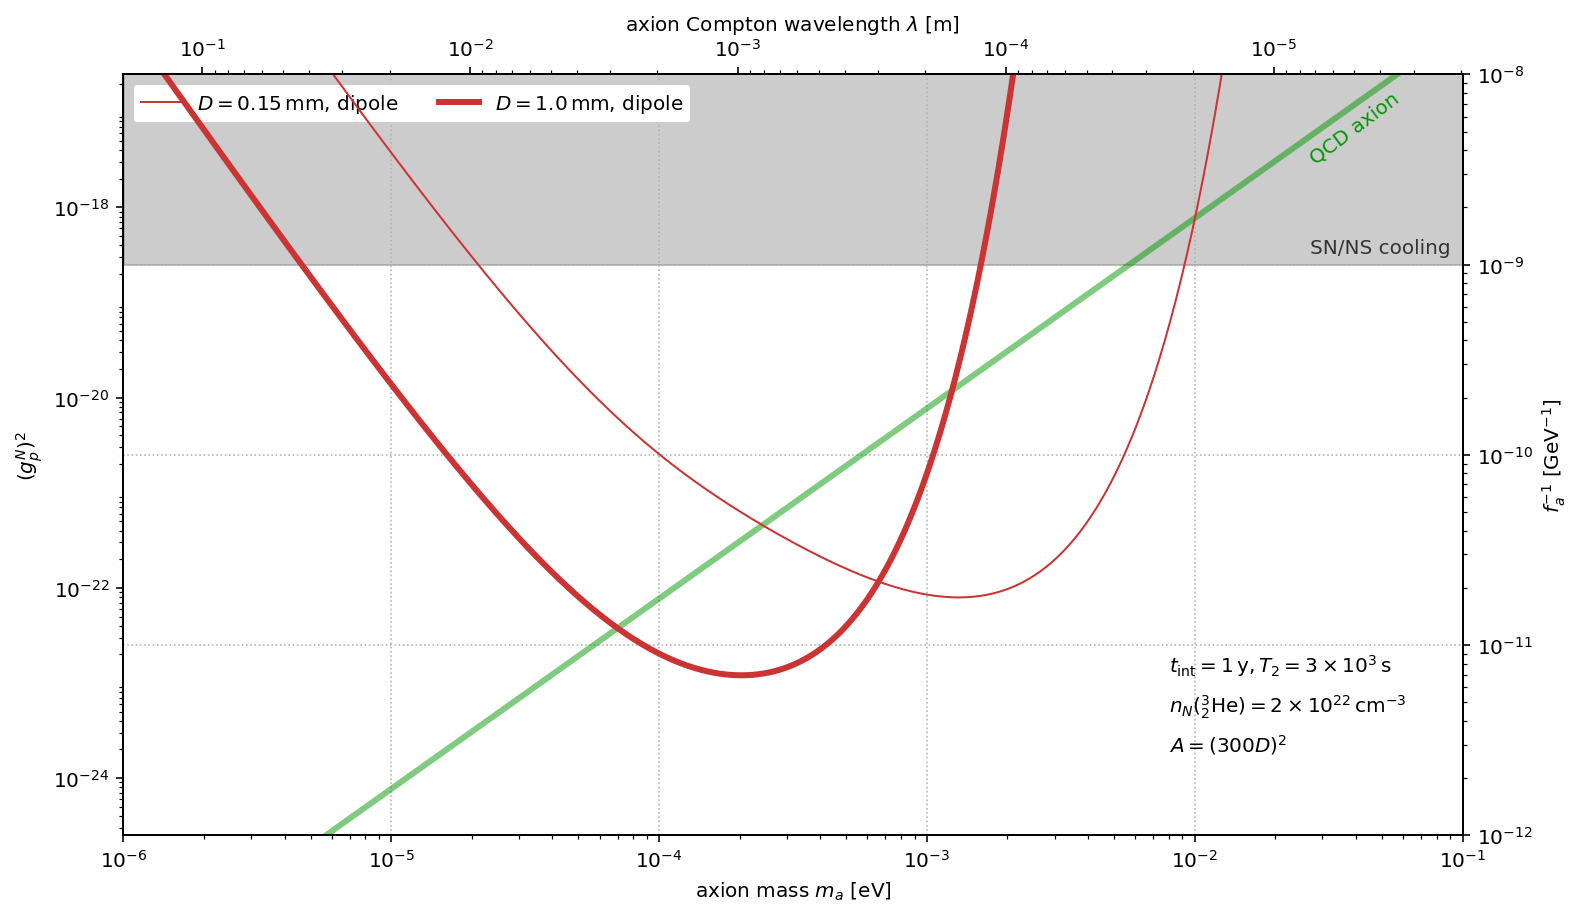

In [79]:
gpN2 = lambda fa_inv: (fa_inv * c_aNN*GeV)**2
#fa_inv = lambda gpN2: np.sqrt(gpN2) / (c_aNN*GeV)
ax2ticks = [10**(-i) for i in range(16, 25, 2)] 

fig, ax = plt.subplots(1,1,figsize=(12,7))
ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.yaxis.tick_left()
ax2.set_yticks(ax2ticks)
ax2.yaxis.set_label_position('left')
ax2.set_ylim((gpN2(10**-12),gpN2(10**-8)))
ax2.set_ylabel('$(g_{p}^N)^2$')
ax.set_xscale('log'); ax.set_yscale('log'); ax.set_xlim(1e-6,1e-1); ax.set_ylim(1e-12,1e-8)
ax_top = ax.twiny();  ax_top.set_xlim(ax.get_xlim()); ax_top.set_xscale('log');
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_xlabel(r'axion mass $m_a~[\mathrm{eV}]$'); ax_top.set_xlabel('axion Compton wavelength $\lambda~[\mathrm{m}]$'); ax.set_ylabel('$f_a^{-1}~[\mathrm{GeV}^{-1}]$');
ticks_right_minor = np.outer(10**(np.arange(-19.0,-5)),np.arange(1.,10.,1.)).flatten()
ticks_right_minor = ticks_right_minor[(ax.get_ylim()[0] < ticks_right_minor) & (ticks_right_minor < ax.get_ylim()[1])]
ticks_right_major = 10**(np.arange(-12,-7.99))
ticks_top_minor = (np.outer(10**(np.arange(2.0,-6.01,-1)),np.arange(1.,10.,1.)).flatten() * meter)**-1 / eV; 
ticks_top_minor = ticks_top_minor[(ax_top.get_xlim()[0] < ticks_top_minor) & (ticks_top_minor < ax_top.get_xlim()[1])]
ticks_top_major = (10**(np.arange(-1.,-5.01,-1)) * meter)**-1 / eV
ax.set_yticks(ticks_right_minor,minor=True); ax.set_yticks(ticks_right_major,minor=False); 
ax.grid(ls='dotted',which='major',axis='both')
ax_top.set_xticks([],minor=True); ax_top.set_xticks(ticks_top_minor,minor=True); ax_top.set_xticklabels([],minor=True);
ax_top.set_xticks(ticks_top_major,minor=False); ax_top.set_xticklabels(['$10^{-1}$','$10^{-2}$','$10^{-3}$','$10^{-4}$','$10^{-5}$'],minor=False);
ax.plot(vec_ma/eV,1/fn_fa(vec_ma)*GeV,color=(0,0.6,0,0.5),lw=3);
ax.fill_between(vec_ma/eV,1e-9,1e-5,color=(0,0,0,0.2))
for i_D, D in enumerate(vec_D):
    vol = D**3 * vec_aspect[i_D]**2
    #plt.plot(vec_ma/eV,GeV*fn_fainv_sens_mon_mqm(vec_ma,D,h,rho_M,P_nuc,c_aNN,T_2,n_N,vol), lw=vec_lw[i_D], color=(1.0, 0.5, 0.0), label=vec_label[i_D]+', monopole (MQM)')
    #plt.plot(vec_ma/eV,GeV*fn_fainv_sens_mon(vec_ma,D,h,rho_S,P_nuc,c_aNN,T_2,n_N_det,vol),lw=vec_lw[i_D],color=(0.2,0.4,0.8),label=vec_label[i_D]+', monopole (Schiff)')
    plt.plot(vec_ma/eV,GeV*fn_fainv_sens_dip(vec_ma,D,h,n_N,P_nuc,c_aNN,T_2,n_N_det,vol),lw=vec_lw[i_D],color=(0.8,0.2,0.2),label=vec_label[i_D]+', dipole')
ax.text(6e-2,8.5e-9,'QCD axion',ha='right',va='top',color=(0,0.6,0,1),rotation=37);
ax.text(9e-2,1.1e-9,'SN/NS cooling',ha='right',va='bottom',color=(0.2,0.2,0.2),rotation=0);
ax.text(0.8e-2,2**(3.2)*1e-12,r'$t_\mathrm{int} = 1\,\mathrm{y}, T_2 = 3 \times 10^3\,\mathrm{s}$',va='top')
ax.text(0.8e-2,2**(2.5)*1e-12,r'$n_N({{}^{3}_2\mathrm{He}}) = 2 \times 10^{22} \, \mathrm{cm}^{-3}$',va='top')
ax.text(0.8e-2,2**(1.8)*1e-12,r'$A = (300 D)^2$',va='top')
#ax.text(0.8e-2,2**(1)*1e-12,r'${}^{235}_{92}\mathrm{U}$ source mass',va='top')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1]
legend = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10,loc='upper left', ncol=2, framealpha=1.0);

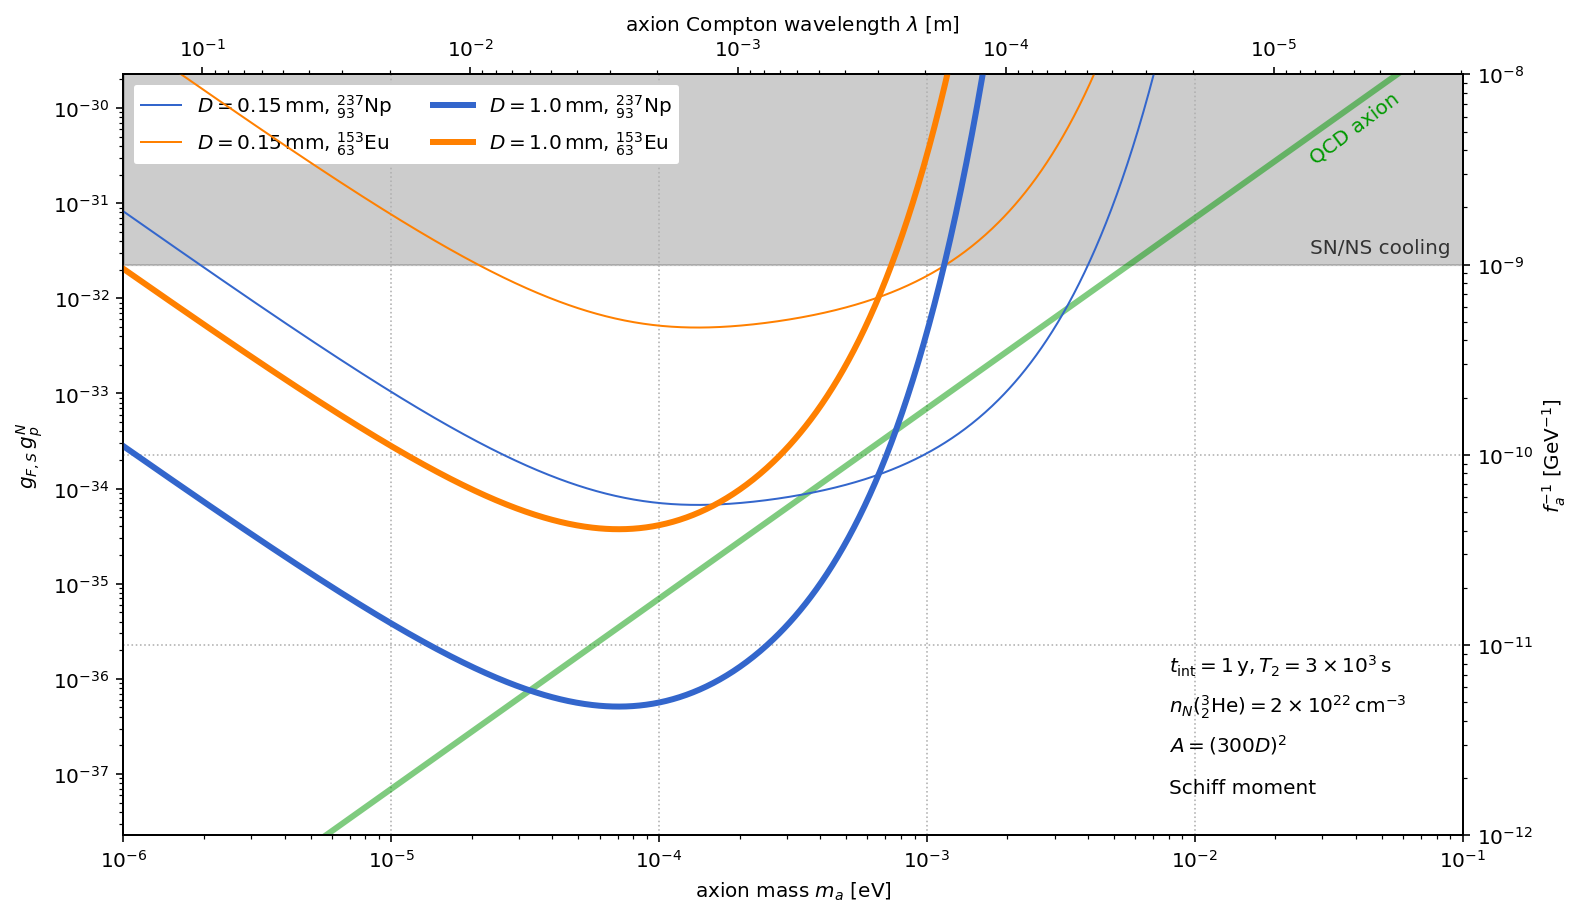

In [75]:
gpNgFS = lambda fa_inv: fa_inv**2*E_S*c_aNN*GeV
#ax2ticks = [10**(-i) for i in range(16, 25, 2)] 

fig, ax = plt.subplots(1,1,figsize=(12,7))
ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.yaxis.tick_left()
#ax2.set_yticks(ax2ticks)
ax2.yaxis.set_label_position('left')
ax2.set_ylim((gpNgFS(10**-12),gpNgFS(10**-8)))
ax2.set_ylabel('$g_{F,S}\,g_{p}^N$')
ax.set_xscale('log'); ax.set_yscale('log'); ax.set_xlim(1e-6,1e-1); ax.set_ylim(1e-12,1e-8)
ax_top = ax.twiny();  ax_top.set_xlim(ax.get_xlim()); ax_top.set_xscale('log');
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_xlabel(r'axion mass $m_a~[\mathrm{eV}]$'); ax_top.set_xlabel('axion Compton wavelength $\lambda~[\mathrm{m}]$'); ax.set_ylabel('$f_a^{-1}~[\mathrm{GeV}^{-1}]$');
ticks_right_minor = np.outer(10**(np.arange(-19.0,-5)),np.arange(1.,10.,1.)).flatten()
ticks_right_minor = ticks_right_minor[(ax.get_ylim()[0] < ticks_right_minor) & (ticks_right_minor < ax.get_ylim()[1])]
ticks_right_major = 10**(np.arange(-12,-7.99))
ticks_top_minor = (np.outer(10**(np.arange(2.0,-6.01,-1)),np.arange(1.,10.,1.)).flatten() * meter)**-1 / eV; 
ticks_top_minor = ticks_top_minor[(ax_top.get_xlim()[0] < ticks_top_minor) & (ticks_top_minor < ax_top.get_xlim()[1])]
ticks_top_major = (10**(np.arange(-1.,-5.01,-1)) * meter)**-1 / eV
ax.set_yticks(ticks_right_minor,minor=True); ax.set_yticks(ticks_right_major,minor=False); 
ax.grid(ls='dotted',which='major',axis='both')
ax_top.set_xticks([],minor=True); ax_top.set_xticks(ticks_top_minor,minor=True); ax_top.set_xticklabels([],minor=True);
ax_top.set_xticks(ticks_top_major,minor=False); ax_top.set_xticklabels(['$10^{-1}$','$10^{-2}$','$10^{-3}$','$10^{-4}$','$10^{-5}$'],minor=False);
ax.plot(vec_ma/eV,1/fn_fa(vec_ma)*GeV,color=(0,0.6,0,0.5),lw=3);
ax.fill_between(vec_ma/eV,1e-9,1e-5,color=(0,0,0,0.2))
for i_D, D in enumerate(vec_D):
    vol = D**3 * vec_aspect[i_D]**2
    plt.plot(vec_ma/eV,GeV*fn_fainv_sens_mon(vec_ma,D,h,rho_S,P_nuc,c_aNN,T_2,n_N_det,vol),lw=vec_lw[i_D],color=(0.2,0.4,0.8),label=vec_label[i_D]+', ${}^{237}_{93}\mathrm{Np}$')
    plt.plot(vec_ma/eV,GeV*fn_fainv_sens_mon(vec_ma,D,h,rho_S_EU,P_nuc,c_aNN,T_2,n_N_det,vol),lw=vec_lw[i_D],color=(1.0, 0.5, 0.0),label=vec_label[i_D]+', ${}^{153}_{63}\mathrm{Eu}$')
ax.text(6e-2,8.5e-9,'QCD axion',ha='right',va='top',color=(0,0.6,0,1),rotation=37);
ax.text(9e-2,1.1e-9,'SN/NS cooling',ha='right',va='bottom',color=(0.2,0.2,0.2),rotation=0);
ax.text(0.8e-2,2**(3.2)*1e-12,r'$t_\mathrm{int} = 1\,\mathrm{y}, T_2 = 3 \times 10^3\,\mathrm{s}$',va='top')
ax.text(0.8e-2,2**(2.5)*1e-12,r'$n_N({{}^{3}_2\mathrm{He}}) = 2 \times 10^{22} \, \mathrm{cm}^{-3}$',va='top')
ax.text(0.8e-2,2**(1.8)*1e-12,r'$A = (300 D)^2$',va='top')
ax.text(0.8e-2,2**(1)*1e-12,r'Schiff moment',va='top')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3]
legend = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10,loc='upper left', ncol=2, framealpha=1.0);

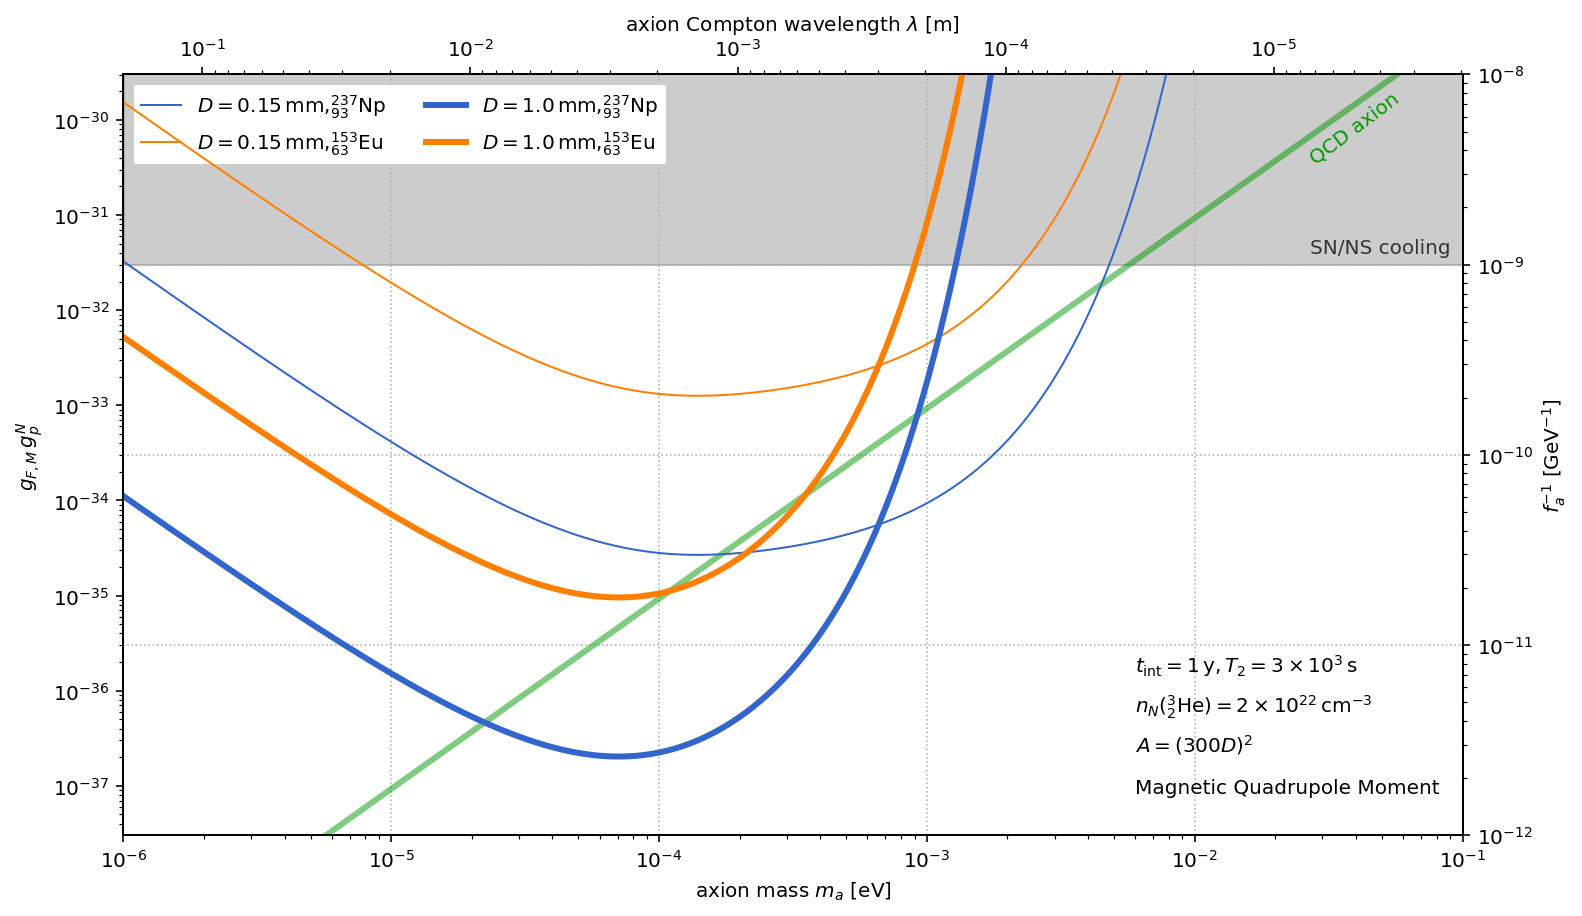

In [78]:
gpNgFM = lambda fa_inv: fa_inv**2*E_M*c_aNN*GeV
#ax2ticks = [10**(-i) for i in range(16, 25, 2)] 

fig, ax = plt.subplots(1,1,figsize=(12,7))
ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.yaxis.tick_left()
#ax2.set_yticks(ax2ticks)
ax2.yaxis.set_label_position('left')
ax2.set_ylim((gpNgFM(10**-12),gpNgFM(10**-8)))
ax2.set_ylabel('$g_{F,M}\,g_{p}^N$')
ax.set_xscale('log'); ax.set_yscale('log'); ax.set_xlim(1e-6,1e-1); ax.set_ylim(1e-12,1e-8)
ax_top = ax.twiny();  ax_top.set_xlim(ax.get_xlim()); ax_top.set_xscale('log');
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_xlabel(r'axion mass $m_a~[\mathrm{eV}]$'); ax_top.set_xlabel('axion Compton wavelength $\lambda~[\mathrm{m}]$'); ax.set_ylabel('$f_a^{-1}~[\mathrm{GeV}^{-1}]$');
ticks_right_minor = np.outer(10**(np.arange(-19.0,-5)),np.arange(1.,10.,1.)).flatten()
ticks_right_minor = ticks_right_minor[(ax.get_ylim()[0] < ticks_right_minor) & (ticks_right_minor < ax.get_ylim()[1])]
ticks_right_major = 10**(np.arange(-12,-7.99))
ticks_top_minor = (np.outer(10**(np.arange(2.0,-6.01,-1)),np.arange(1.,10.,1.)).flatten() * meter)**-1 / eV; 
ticks_top_minor = ticks_top_minor[(ax_top.get_xlim()[0] < ticks_top_minor) & (ticks_top_minor < ax_top.get_xlim()[1])]
ticks_top_major = (10**(np.arange(-1.,-5.01,-1)) * meter)**-1 / eV
ax.set_yticks(ticks_right_minor,minor=True); ax.set_yticks(ticks_right_major,minor=False); 
ax.grid(ls='dotted',which='major',axis='both')
ax_top.set_xticks([],minor=True); ax_top.set_xticks(ticks_top_minor,minor=True); ax_top.set_xticklabels([],minor=True);
ax_top.set_xticks(ticks_top_major,minor=False); ax_top.set_xticklabels(['$10^{-1}$','$10^{-2}$','$10^{-3}$','$10^{-4}$','$10^{-5}$'],minor=False);
ax.plot(vec_ma/eV,1/fn_fa(vec_ma)*GeV,color=(0,0.6,0,0.5),lw=3);
ax.fill_between(vec_ma/eV,1e-9,1e-5,color=(0,0,0,0.2))
for i_D, D in enumerate(vec_D):
    vol = D**3 * vec_aspect[i_D]**2
    plt.plot(vec_ma/eV,GeV*fn_fainv_sens_mon_mqm(vec_ma,D,h,rho_M,P_nuc,c_aNN,T_2,n_N,vol), lw=vec_lw[i_D], color=(0.2,0.4,0.8), label=vec_label[i_D]+',${}^{237}_{93}\mathrm{Np}$')
    plt.plot(vec_ma/eV,GeV*fn_fainv_sens_mon_mqm(vec_ma,D,h,rho_M_EU,P_nuc,c_aNN,T_2,n_N,vol), lw=vec_lw[i_D], color=(1.0, 0.5, 0.0), label=vec_label[i_D]+',${}^{153}_{63}\mathrm{Eu}$')
ax.text(6e-2,8.5e-9,'QCD axion',ha='right',va='top',color=(0,0.6,0,1),rotation=37);
ax.text(9e-2,1.1e-9,'SN/NS cooling',ha='right',va='bottom',color=(0.2,0.2,0.2),rotation=0);
ax.text(0.6e-2,2**(3.2)*1e-12,r'$t_\mathrm{int} = 1\,\mathrm{y}, T_2 = 3 \times 10^3\,\mathrm{s}$',va='top')
ax.text(0.6e-2,2**(2.5)*1e-12,r'$n_N({{}^{3}_2\mathrm{He}}) = 2 \times 10^{22} \, \mathrm{cm}^{-3}$',va='top')
ax.text(0.6e-2,2**(1.8)*1e-12,r'$A = (300 D)^2$',va='top')
ax.text(0.6e-2,2**(1)*1e-12,r'Magnetic Quadrupole Moment',va='top')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3]
legend = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10,loc='upper left', ncol=2, framealpha=1.0);